In [1]:

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline

# Load the dataset
df = pd.read_csv('TEST.csv')

In [2]:
df

,windspeed,rainfall,area,yield,percentageofarea,darea,yielda,fgprice,dctrice
0,0,1.535972,2870.00,3.37,0.247070,709.091324,0.832626398,20.79,11135504
1,0,2.141071,491.00,4.36,0.244428,120.014173,1.065706303,20.79,2412279.37
2,7.116629346,5.809375,1330.88,4.42,0.312983,416.543187,1.383386094,20.79,10868283.84
3,67.08946747,3.908854,5767.00,4.65,0.567852,3274.800267,2.640510013,20.79,163091064.2
4,0,0.805469,4710.00,4.14,0.130472,614.521934,0.540153038,20.79,6260539.25
...,...,...,...,...,...,...,...,...,...
21016,0,0.522989,2936.00,0,0.264956,777.910078,0,14.32,0
21017,0,0.110000,156.00,2.85,0.101081,15.768650,0.288081111,14.32,59014.04
21018,10.51271508,0.225000,6376.00,6.88,0.131057,835.618326,0.901670967,14.32,9788183.48
21019,2.823089172,0.379861,2065.00,3.14,0.115129,237.741383,0.361505057,14.32,1116516.69


In [3]:
# Split the dataset into features and target variable
X = df.drop(['dctrice','fgprice'], axis=1)
y = df.drop(['darea','percentageofarea','yielda','windspeed','rainfall','area', 'yield', 'fgprice'], axis=1)


In [4]:
X.shape, y.shape

((21021, 7), (21021, 1))

In [5]:
# First split the data into a training set and a temporary set using an 80-20 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split the temporary set into a validation set and a test set using a 50-50 split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:

X_train.shape, y_train.shape

((16816, 7), (16816, 1))

In [7]:
y_train.info()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16816 entries, 13628 to 15795
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   dctrice  16816 non-null  object
dtypes: object(1)
memory usage: 262.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16816 entries, 13628 to 15795
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   windspeed         16816 non-null  object 
 1   rainfall          16816 non-null  float64
 2   area              16816 non-null  float64
 3   yield             16705 non-null  object 
 4   percentageofarea  16816 non-null  float64
 5   darea             16816 non-null  float64
 6   yielda            16816 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1.0+ MB


In [8]:
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce')
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce')
y_train = pd.DataFrame(y_train).apply(pd.to_numeric, errors='coerce')
y_test = pd.DataFrame(y_test).apply(pd.to_numeric, errors='coerce')

In [9]:
X_train.shape, y_train.shape


((16816, 7), (16816, 1))

In [10]:
# Remove the rows with zero values from the training set and testing set
mask = X_train['windspeed'] != 0

# Apply the mask to X_train
X_train = X_train[mask]

# Apply the mask to y_train
y_train = y_train[mask]

In [11]:
# Remove the rows with zero values from the training set and testing set
mask =y_train['dctrice'] != 0

# Apply the mask to X_train
X_train = X_train[mask]

# Apply the mask to y_train
y_train = y_train[mask]

In [12]:
X_train.shape, y_train.shape

((6653, 7), (6653, 1))

In [13]:
nan_rows = X_train[X_train.isna().any(axis=1)].index
X_train = X_train.drop(nan_rows)
y_train = y_train.drop(nan_rows)

print(np.where(pd.isnull(X_train)))

(array([], dtype=int64), array([], dtype=int64))


In [14]:
X_train.shape,y_train.shape

((6647, 7), (6647, 1))

In [15]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)

In [16]:
# #Convert X_test to DataFrame

# X_test_df = pd.DataFrame(X_val_scaled)

# nan_rows = X_test_df[X_test_df.isna().any(axis=1)].index
# X_test_scaled_final = X_test_df.drop(nan_rows)

# print(np.where(pd.isnull(X_test_scaled_final)))


In [17]:
nan_rows = X_test[X_test.isna().any(axis=1)].index
X_test = X_test.drop(nan_rows)
y_test = y_test.drop(nan_rows)

In [18]:
nan_rows = X_val[X_val.isna().any(axis=1)].index
X_val = X_val.drop(nan_rows)
y_val = y_val.drop(nan_rows)

In [19]:
X_val.shape, y_val.shape

((2090, 7), (2090, 1))

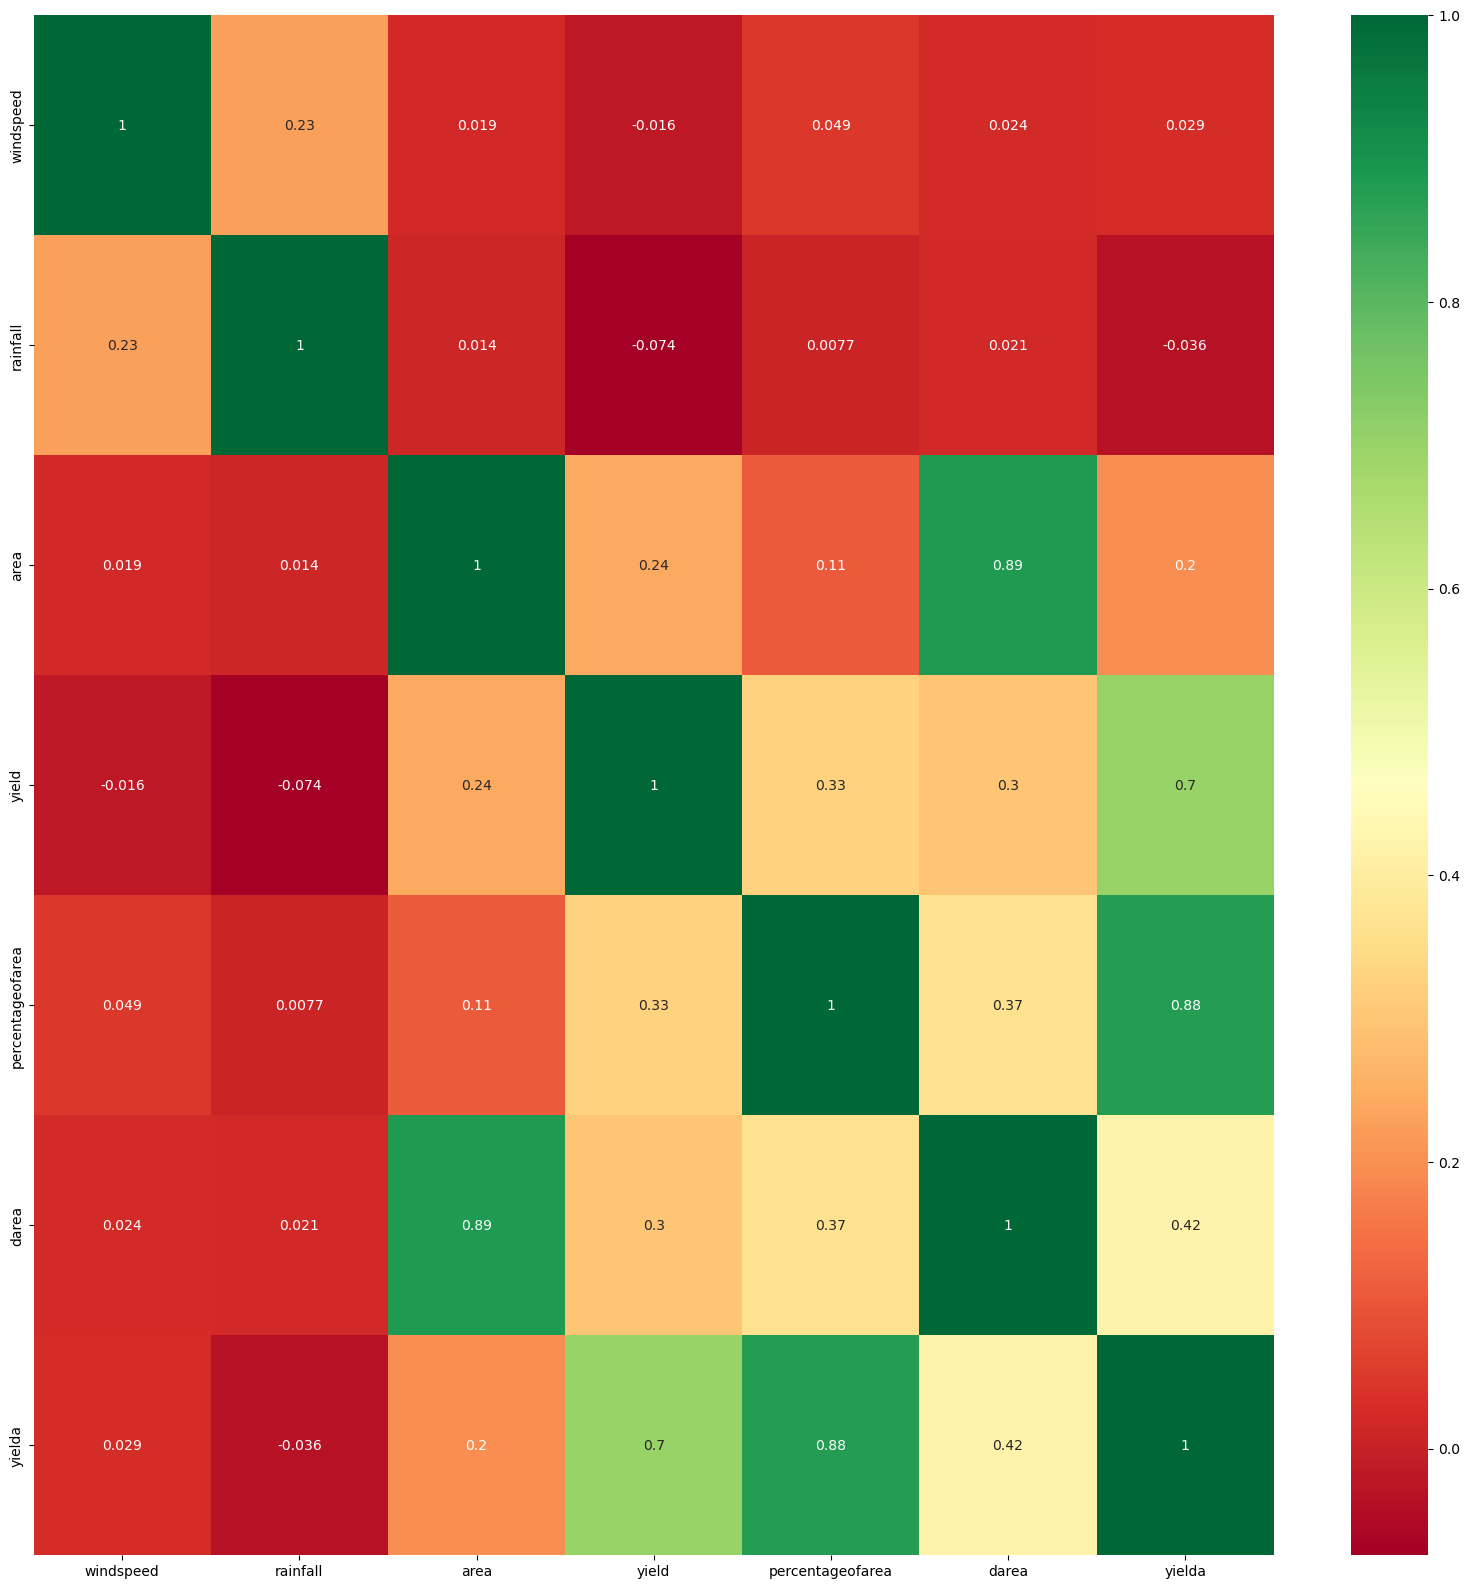

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt


corrmat = X_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

# Plot heat map
g=sns.heatmap(X_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [21]:
X_train

,windspeed,rainfall,area,yield,percentageofarea,darea,yielda
10790,15.665676,0.117560,370.0,2.06,0.186675,69.069876,0.384551
17614,6.462579,2.849702,1725.0,3.89,0.203594,351.199924,0.791981
6235,8.982324,3.426458,2487.0,4.20,0.526793,1310.133828,2.212530
18061,12.384844,3.062153,1267.0,4.17,0.547221,693.329512,2.281913
15375,7.112005,5.545536,3730.0,2.76,0.076575,285.626603,0.211348
...,...,...,...,...,...,...,...
16023,3.000949,0.853191,17.0,5.58,0.403076,6.852292,2.249164
14423,19.529917,0.503472,944.0,3.12,0.162055,152.979819,0.505611
16850,1.709343,1.346094,3561.0,4.17,0.068570,244.178127,0.285937
11284,14.460432,1.635185,6760.0,3.20,0.150795,1019.376535,0.482545


In [22]:

# model = SVR(kernel='poly', C=0.0372, degree=2, gamma=0.0513)
# model.fit(X_train_scaled, y_train)

# Create a pipeline with StandardScaler and SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


pipeline = make_pipeline(StandardScaler(), SVR(kernel='poly', C=5, degree=7, gamma='scale', coef0=2.5))

# Fit the pipeline on the original, unscaled data
pipeline.fit(X_train, y_train)

# model = SVR(kernel='poly', C=0.0313, degree=2, gamma=0.0281, coef0=0.0)
# model.fit(X_train, y_train)


# model = SVR(kernel='poly', C=0.5, gamma=2.7, verbose=True)
# model.fit(X_train_scaled, y_train)

# # Make predictions on the test set
predictionsVal = pipeline.predict(X_val)

# Evaluate the model

maeV = mean_absolute_error(y_val, predictionsVal)
print(f'Mean Absolute Error (Validation): {maeV}')

r2 = pipeline.score(X_val, y_val)
print(f'R-squared (Validation): {r2}')


predictions = pipeline.predict(X_test)

# Evaluate the model

mae = mean_absolute_error(y_test, predictions)
print(f'\nMean Absolute Error (Test): {mae}')

mae_percentage_test = (mae / y_test.values.mean()) * 100
print(f'Mean Absolute Error (Test, p.p.): {mae_percentage_test}%')



r2 = pipeline.score(X_test, y_test)
print(f'R-squared (Test): {r2}')


c:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error (Validation): 3443791.505699309
R-squared (Validation): 0.8894707353787242

Mean Absolute Error (Test): 3245447.748245094
Mean Absolute Error (Test, p.p.): 38.450267704090194%
R-squared (Test): 0.8789553270633234


In [23]:
print(['{:.2f}'.format(pred) for pred in predictionsVal])

['1485186.08', '1812974.06', '4635561.73', '-715924.48', '-968854.66', '-647929.05', '-61996.99', '-1084756.06', '580006.66', '795622.88', '-491773.15', '2300119.32', '7675830.97', '134103790.38', '5802349.64', '2348277.43', '-469536.46', '475476.33', '4338035.44', '1670626.82', '336042.69', '-886656.77', '3254118.22', '1382433.68', '-404443.46', '64936342.30', '2653275.51', '2286686.16', '546939.27', '-1150434.73', '909272.44', '413554.59', '16640357.54', '1615390.00', '2564127.34', '12298760.71', '-674129.56', '8627908.86', '949232.90', '2897067.73', '11355894.07', '2861558.24', '1376156.89', '1584969.76', '953493.74', '1404930.73', '953656.58', '1647679.51', '3571121.41', '3264246.61', '-598064.17', '203294042.72', '-974282.18', '-1201285.01', '-544994.88', '217873.33', '-851952.86', '-906813.22', '1440666.01', '5699357.53', '2711560.56', '1397285.12', '-299326.72', '-498745.50', '1788154.58', '912464.82', '948611.57', '27000460.53', '-1036040.13', '2911194.01', '2062063.88', '-4416

In [24]:

from joblib import dump

dump(pipeline, 'SVR.joblib')


['SVR.joblib']